<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/RL002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(0)
import pandas as pd
import gym

这段代码的目的是创建一个包含各种强化学习环境（来自`gym`库）特定信息的DataFrame。下面是对代码的详细解释：

1. **初始化DataFrame列**：
   ```python
   space_names = ['观测空间', '动作空间', '奖励范围', '最大步数']
   df = pd.DataFrame(columns=space_names)
   ```
   这里定义了一个名为`space_names`的列表，包含四个元素，分别代表DataFrame的列名。然后，使用这些列名创建一个空的DataFrame `df`。

2. **获取所有注册的环境**：
   ```python
   env_specs = gym.envs.registry.all()
   ```
   通过调用`gym.envs.registry.all()`获取所有在`gym`库中注册的环境规格。`env_specs`是一个包含所有环境规格的列表。

3. **遍历所有环境规格**：
   ```python
   for env_spec in env_specs:
       env_id = env_spec.id
   ```
   遍历`env_specs`列表，每次迭代中获取环境的ID（`env_id`）。

4. **尝试创建环境并记录信息**：
   ```python
   try:
       env = gym.make(env_id)
       observation_space = env.observation_space
       action_space = env.action_space
       reward_range = env.reward_range
       max_episode_steps = None
       if isinstance(env, gym.wrappers.time_limit.TimeLimit):
           max_episode_steps = env._max_episode_steps
       df.loc[env_id] = [observation_space, action_space, reward_range, max_episode_steps]
   except:
       pass
   ```
   在`try`块中，尝试使用`gym.make(env_id)`创建环境实例`env`。然后，从环境实例中提取以下信息：
   - `observation_space`：观测空间，描述环境状态的格式和范围。
   - `action_space`：动作空间，描述可以采取的动作的格式和范围。
   - `reward_range`：奖励范围，一个元组，表示奖励的最小值和最大值。
   - `max_episode_steps`：最大步数，如果环境是时间限制的（`TimeLimit`包装器），则提取`_max_episode_steps`属性；否则设置为`None`。

   提取这些信息后，将它们作为一行添加到DataFrame `df`中，行索引为`env_id`。

   如果在尝试创建环境或提取信息时发生错误，`except`块会捕获异常并跳过当前环境。

5. **显示DataFrame**：
   ```python
   with pd.option_context('display.max_rows', None):
       display(df)
   ```
   使用`pd.option_context`设置显示选项，使得DataFrame在输出时不限制行数。然后，使用`display`函数显示整个DataFrame。

总之，这段代码的目的是遍历`gym`库中所有注册的环境，提取每个环境的观测空间、动作空间、奖励范围和最大步数，并将这些信息存储在一个DataFrame中以便查看和分析。

在强化学习中，观测空间、动作空间、奖励范围和最大步数是几个核心概念，它们共同定义了智能体与环境交互的基本框架。下面分别解释这些概念，并给出相应的例子。

### 1. 观测空间（Observation Space）

观测空间指的是智能体从环境中接收到的所有可能观测的集合。这些观测可以是环境的直接状态，也可以是经过某种处理（如传感器数据、图像处理等）后的信息。观测空间可以是连续的（如连续的图像数据）或离散的（如有限个传感器读数）。

**例子**：在自动驾驶汽车的场景中，观测空间可能包括摄像头捕捉到的连续图像数据、激光雷达扫描结果、以及车辆自身的速度、加速度等传感器数据。智能体需要根据这些观测数据来做出决策。

### 2. 动作空间（Action Space）

动作空间是智能体可以采取的所有可能动作的集合。动作空间同样可以是连续的（如控制机械臂的连续角度变化）或离散的（如游戏中的移动指令上、下、左、右）。

**例子**：在雅达利游戏Pong中，智能体的动作空间是离散的，包括向左移动挡板、向右移动挡板、不移动等。智能体需要根据当前的观测（如球和挡板的位置）来从这些动作中选择一个执行。

### 3. 奖励范围（Reward Range）

奖励范围是指智能体在执行动作后从环境中接收到的奖励值的范围。奖励是环境对智能体动作的一种即时反馈，用于指导智能体的学习。奖励范围可以是任意的实数区间，但通常为了简化问题，会将其限制在一个特定的范围内，如[-1, 1]或[0, 100]。

**例子**：在迷宫探索任务中，智能体每走一步可能获得的奖励是-1（表示消耗了能量或时间），而当智能体找到出口时，可能获得一个较大的正奖励，如100。这样，智能体的目标就是通过学习找到一条从起点到出口的路径，使得累积奖励最大化。

### 4. 最大步数（Maximum Episode Length）

最大步数是指一个训练或测试回合中，智能体与环境交互的最大步数限制。这是为了避免智能体陷入无限循环或与环境的交互时间过长。当达到最大步数时，回合会强制结束，无论智能体是否完成了任务。

**例子**：在玩超级玛丽兄弟这款游戏时，我们可以设定每个回合的最大步数为一定数量的游戏帧或时间单位。如果智能体在这么多步内未能通关或达到其他目标，回合就会结束，并计算该回合的累积奖励。

综上所述，观测空间、动作空间、奖励范围和最大步数是强化学习中定义智能体与环境交互方式的关键要素。它们共同构成了强化学习问题的基本框架，使得智能体能够在复杂且不确定的环境中进行学习和决策。

In [ ]:
space_names = ['观测空间', '动作空间', '奖励范围', '最大步数']
df = pd.DataFrame(columns=space_names)

env_specs = gym.envs.registry.all()
for env_spec in env_specs:
    env_id = env_spec.id
    try:
        env = gym.make(env_id)
        observation_space = env.observation_space
        action_space = env.action_space
        reward_range = env.reward_range
        max_episode_steps = None
        if isinstance(env, gym.wrappers.time_limit.TimeLimit):
            max_episode_steps = env._max_episode_steps
        df.loc[env_id] = [observation_space, action_space, reward_range, max_episode_steps]
    except:
        pass

with pd.option_context('display.max_rows', None):
    display(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in futu

,观测空间,动作空间,奖励范围,最大步数
CartPole-v0,Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e...,Discrete(2),"(-inf, inf)",200
CartPole-v1,Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e...,Discrete(2),"(-inf, inf)",500
MountainCar-v0,"Box([-1.2 -0.07], [0.6 0.07], (2,), float32)",Discrete(3),"(-inf, inf)",200
MountainCarContinuous-v0,"Box([-1.2 -0.07], [0.6 0.07], (2,), float32)","Box(-1.0, 1.0, (1,), float32)","(-inf, inf)",999
Pendulum-v1,"Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)","Box(-2.0, 2.0, (1,), float32)","(-inf, inf)",200
Acrobot-v1,Box([ -1. -1. -1. -1. ...,Discrete(3),"(-inf, inf)",500
Blackjack-v1,"(Discrete(32), Discrete(11), Discrete(2))",Discrete(2),"(-inf, inf)",None
FrozenLake-v1,Discrete(16),Discrete(4),"(0, 1)",100
FrozenLake8x8-v1,Discrete(64),Discrete(4),"(0, 1)",200
CliffWalking-v0,Discrete(48),Discrete(4),"(-inf, inf)",None


In [ ]:
env = gym.make('Pendulum-v1')
print('观测空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('观测范围 = {} ~ {}'.format(env.observation_space.low,
        env.observation_space.high))
#print('动作数 = {}'.format(env.action_space.n))

# 对于连续动作空间，打印动作空间的形状和范围
if isinstance(env.action_space, gym.spaces.Box):
    print('动作空间形状 = {}'.format(env.action_space.shape))
    print('动作范围 = {} ~ {}'.format(env.action_space.low, env.action_space.high))

观测空间 = Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
动作空间 = Box(-2.0, 2.0, (1,), float32)
观测范围 = [-1. -1. -8.] ~ [1. 1. 8.]
动作空间形状 = (1,)
动作范围 = [-2.] ~ [2.]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


注意：
 `Pendulum-v1` 环境的动作空间是一个连续空间（`Box` 类型），而不是一个离散空间（如 `Discrete` 类型）。在连续空间中，没有 `n` 这个属性，因为动作不是离散的、有限数量的选项，而是一个在一定范围内的连续值。

可以打印出动作空间的形状或范围：

```python
import gym

env = gym.make('Pendulum-v1')
print('观测空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('观测范围 = {} ~ {}'.format(env.observation_space.low,
                                  env.observation_space.high))
# 对于连续动作空间，打印动作空间的形状和范围
if isinstance(env.action_space, gym.spaces.Box):
    print('动作空间形状 = {}'.format(env.action_space.shape))
    print('动作范围 = {} ~ {}'.format(env.action_space.low, env.action_space.high))
```

这段代码首先检查动作空间是否为 `Box` 类型，然后打印出相应的形状和范围。这样，就可以正确地处理 `Pendulum-v1` 环境的连续动作空间了。

这段代码定义了一个名为 `BespokeAgent` 的类，该类似乎被设计用于在某个环境（通过 `env` 参数指定）中做出决策。以下是对代码的详细解释：

### 类定义：`BespokeAgent`

1. **初始化方法：`__init__`**
    ```python
    def __init__(self, env):
        pass
    ```
    - 这个方法是类的构造函数，用于初始化对象的状态。在这里，它接收一个参数 `env`，但并未对其进行任何操作（使用了 `pass` 语句）。可能的设计意图是在未来扩展初始化过程，目前只是一个占位符。

2. **决策方法：`decide`**
    ```python
    def decide(self, observation):
        position, velocity = observation
        lb = min(-0.09 * (position + 0.25) ** 2 + 0.03,
                0.3 * (position + 0.9) ** 4 - 0.008)
        ub = -0.07 * (position + 0.38) ** 2 + 0.07
        if lb < velocity < ub:
            action = 2
        else:
            action = 0
        return action
    ```
    - 这个方法用于根据当前的 `observation`（观测值）来做出决策。
    - `observation` 被解构为两个变量：`position`（位置）和 `velocity`（速度）。
    - 计算两个界限值 `lb`（下界）和 `ub`（上界）。这些界限值是基于位置的复杂数学表达式计算得出的。
    - 如果速度 `velocity` 位于 `lb` 和 `ub` 之间，则采取动作 `2`；否则，采取动作 `0`。
    - 最终返回所选择的动作。

3. **学习方法：`learn`**
    ```python
    def learn(self, *args):
        pass
    ```
    - 这个方法设计为用于学习，但目前未实现任何功能（使用了 `pass` 语句）。它接收任意数量的参数（通过 `*args`），可能用于未来添加学习相关的逻辑。

### 创建 `BespokeAgent` 实例

```python
agent = BespokeAgent(env)
```
- 这行代码创建了一个 `BespokeAgent` 类的实例，并将其赋值给变量 `agent`。
- `env` 是传递给构造函数的参数，代表智能体所处的环境。尽管在 `__init__` 方法中未对 `env` 进行任何操作，但通常这样的设计意味着未来可能会在这个环境中使用或存储相关信息。

### 总结

这个 `BespokeAgent` 类目前主要实现了一个基于位置和速度观测值进行决策的简单逻辑。学习功能尚未实现，可能是为将来的扩展预留的。代码中的数学表达式和逻辑可能特定于某个应用场景（如物理模拟、控制系统等），需要根据具体背景进一步理解。

In [ ]:
class BespokeAgent:
    def __init__(self, env):
        pass

    def decide(self, observation): # 决策
        position, velocity = observation
        lb = min(-0.09 * (position + 0.25) ** 2 + 0.03,
                0.3 * (position + 0.9) ** 4 - 0.008)
        ub = -0.07 * (position + 0.38) ** 2 + 0.07
        if lb < velocity < ub:
            action = 2
        else:
            action = 0
        return action # 返回动作

    def learn(self, *args): # 学习
        pass

agent = BespokeAgent(env)

为了与 `Pendulum-v1` 环境兼容，我们需要对您的 `BespokeAgent` 类进行一些调整。首先，`Pendulum-v1` 环境的观测空间是一个三维数组，包括摆的角度（`theta`）、角速度（`theta_dot`）以及一个辅助的角度表示（通常用于处理角度的周期性，即 `sin(theta)` 和 `cos(theta)` 之一，但在直接的观测中通常不包括这个）。因此，我们需要适应这个三维的输入。

其次，`Pendulum-v1` 的动作空间是一个连续的区间，通常在 `[-2.0, 2.0]` 内（这取决于环境的具体实现，但这是常见的范围），而不是离散的几个动作。因此，我们的决策函数需要输出一个在这个区间内的连续值，而不是离散的 `0` 或 `2`。

下面是根据 `Pendulum-v1` 环境修改后的 `BespokeAgent` 类：

```python
import gym
import numpy as np

class BespokeAgent:
    def __init__(self, env):
        self.env = env
        # 可以初始化一些其他需要的参数或模型

    def decide(self, observation): # 决策
        # observation 是一个包含 theta, theta_dot (可能还有 sin(theta), cos(theta)) 的数组
        theta, theta_dot = observation[:2]  # 我们只使用 theta 和 theta_dot
        
        # 这里我们可以设计一个基于 theta 和 theta_dot 的控制策略
        # 例如，使用一个简单的 PD 控制器（比例-微分控制器）
        kp = -1.0  # 比例系数（需要调试）
        kd = -0.1  # 微分系数（需要调试）
        action = kp * theta + kd * theta_dot
        
        # 限制动作在 [-2.0, 2.0] 范围内（这是 Pendulum-v1 的常见动作范围）
        action = np.clip(action, -2.0, 2.0)
        
        return action # 返回动作

    def learn(self, *args): # 学习
        # 目前不实现学习功能
        pass

# 创建 Pendulum-v1 环境
env = gym.make('Pendulum-v1')
# 初始化代理
agent = BespokeAgent(env)

# 示例：如何使用代理进行决策
observation = env.reset()  # 重置环境，获取初始观测
action = agent.decide(observation)  # 使用代理的决策函数获取动作
```

在这个修改后的版本中，`decide` 方法现在接受一个三维的观测数组（尽管我们只使用了前两个元素，即角度和角速度），并输出一个在 `[-2.0, 2.0]` 范围内的连续动作值。这里我们使用了一个简单的 PD 控制器作为控制策略的例子，但您可以根据需要替换为更复杂的控制逻辑或学习算法。

请注意，这个代码示例没有实现学习功能（`learn` 方法是空的），因为您提供的原始代码也没有包含学习逻辑。如果您想实现学习功能，您需要在 `learn` 方法中添加相应的算法，并使用环境提供的反馈（例如奖励和新的观测）来更新代理的内部状态或参数。

In [ ]:
class BespokeAgent:
    def __init__(self, env):
        self.env = env
        # 可以初始化一些其他需要的参数或模型

    def decide(self, observation): # 决策
        ## observation 是一个包含 theta, theta_dot (可能还有 sin(theta), cos(theta)) 的数组
        #theta, theta_dot = observation[:2]  # 我们只使用 theta 和 theta_dot
        # observation 是一个包含 [cos(theta), sin(theta), theta_dot] 的数组
        cos_theta, sin_theta, theta_dot = observation
        theta = np.arctan2(sin_theta, cos_theta)  # 计算 theta

        # 这里我们可以设计一个基于 theta 和 theta_dot 的控制策略
        # 例如，使用一个简单的 PD 控制器（比例-微分控制器）
        kp = -1.0  # 比例系数（需要调试）
        kd = -0.1  # 微分系数（需要调试）
        action = kp * theta + kd * theta_dot

        # 限制动作在 [-2.0, 2.0] 范围内（这是 Pendulum-v1 的常见动作范围）
        action = np.clip(action, -2.0, 2.0)

        #return action # 返回动作
        return [action]  # 返回动作，需要是一个列表

    def learn(self, *args): # 学习
        # 目前不实现学习功能
        pass

# 创建 Pendulum-v1 环境
env = gym.make('Pendulum-v1')
# 初始化代理
agent = BespokeAgent(env)

智能体与环境交互

在Colab环境中，直接显示图形界面通常是不支持的，因为Colab运行在云端，而你无法直接查看或交互云端的图形界面。不过，你可以通过一些方法间接地查看图形输出，比如使用视频流或将图像保存为文件然后查看。

对于强化学习环境，一个常见的做法是将环境的渲染输出转换为图像，并在Colab中显示这些图像。这通常涉及到修改环境代码或使用特定的库来捕获渲染输出。



In [ ]:
def play_montecarlo(env, agent, render=False, train=False):
    episode_reward = 0. # 记录回合总奖励，初始化为0
    observation = env.reset() # 重置游戏环境，开始新回合
    while True: # 不断循环，直到回合结束
        if render: # 判断是否显示
            env.render() # 显示图形界面，图形界面可以用 env.close() 语句关闭
        action = agent.decide(observation)
        next_observation, reward, done, _ = env.step(action) # 执行动作
        episode_reward += reward # 收集回合奖励
        if train: # 判断是否训练智能体
            agent.learn(observation, action, reward, done) # 学习
        if done: # 回合结束，跳出循环
            break
        observation = next_observation
    return episode_reward # 返回回合总奖励

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def play_montecarlo(env, agent, render=False, train=False):
    episode_reward = 0.  # 记录回合总奖励，初始化为0
    observation = env.reset()  # 重置游戏环境，开始新回合

    images = []  # 用于存储渲染图像的列表

    while True:  # 不断循环，直到回合结束
        if render:
            # 捕获渲染输出为图像数组
            img = env.render(mode='rgb_array')
            images.append(img)  # 将图像添加到列表中

        action = agent.decide(observation)
        next_observation, reward, done, _ = env.step(action)  # 执行动作

        episode_reward += reward  # 收集回合奖励

        if train:  # 判断是否训练智能体
            agent.learn(observation, action, reward, done)  # 学习

        if done:  # 回合结束，跳出循环
            break

        observation = next_observation

    if render:
        # 在Colab中逐个显示图像
        for img in images:
            plt.imshow(img)
            plt.axis('off')
            display(plt.gcf())  # 显示当前图像
            time.sleep(0.1)  # 控制显示速度
            clear_output(wait=True)  # 清除之前的输出
            plt.close()  # 关闭图像窗口，避免内存泄漏

    return episode_reward  # 返回回合总奖励

# 注意：确保你的环境支持'rgb_array'模式，并且已经安装了必要的库（如matplotlib）

交互1回合，并图形化显示

In [ ]:
#env.seed(0) # 设置随机数种子，只是为了让结果可以精确复现，一般情况下可删去
env.reset(seed=0)  # 新版本的 gym 中，使用 reset() 方法设置种子
episode_reward = play_montecarlo(env, agent, render=True)
print('回合奖励 = {}'.format(episode_reward))
env.close() # 此语句可关闭图形界面

回合奖励 = -1500.760615988375


评估性能：交互10回合求平均



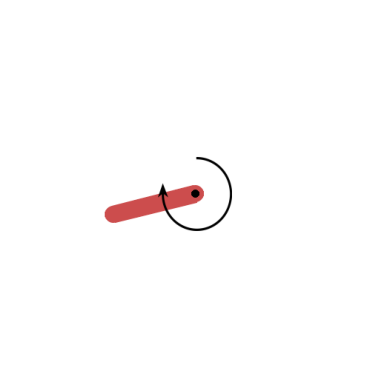

平均回合奖励 = -1241.8867404610673


In [ ]:
episode_rewards = [play_montecarlo(env, agent, render=True) for _ in range(10)]
print('平均回合奖励 = {}'.format(np.mean(episode_rewards)))